In [1]:
#  import package and data, set wd
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import matplotlib.image as mgimg
# from matplotlib.animation import FuncAnimation
import numpy as np
# from IPython.display import HTML
import os
import math
import pandas as pd

# set work directory
os.chdir('D:\\fault_sensor_data\\python_file')

# data
from read_data_ver2 import *  # notice the version of readdata

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done


In [2]:
# set parameters
# index_ = 7900  # stick
# index_ = 8671  # large drop
index_ = 8476
individuals_ =    [int(i_) for i_ in range(286,2203)] 
percent_ = 90

In [3]:
# select particle with high speed

# extract data
x1_ = np.zeros(len(individuals_))  # save the x1 of each coodinate
x2_ = np.zeros(len(individuals_))  # save the x2 of each coodinate
v_ = np.zeros(len(individuals_))
marker_v_ = np.zeros(len(individuals_))
count_ = 0
for i_ in individuals_:
    x1_[count_] = sensors_[i_].loc[index_, 'cx']
    x2_[count_] = sensors_[i_].loc[index_, 'cy']
    v_[count_] =  math.sqrt((sensors_[i_].loc[index_, 'vx'] ** 2) + (sensors_[i_].loc[index_, 'vy'] ** 2))
    count_ += 1
# label particle
threshold_ =  np.percentile(v_, percent_)
count_ = 0
for i_ in individuals_:
    if v_[count_] > threshold_:
        marker_v_[count_] = 1
    count_ += 1


In [4]:
# select particle with high stress

# extract data
x1_ = np.zeros(len(individuals_))
x2_ = np.zeros(len(individuals_))
tau_ = np.zeros(len(individuals_))
sigma1_ = np.zeros(len(individuals_))
sigma2_ = np.zeros(len(individuals_))
marker_tau_ = np.zeros(len(individuals_))
marker_sigma1_ = np.zeros(len(individuals_))
marker_sigma2_ = np.zeros(len(individuals_))
count_ = 0
for i_ in individuals_:
    x1_[count_] = sensors_[i_].loc[index_, 'cx']
    x2_[count_] = sensors_[i_].loc[index_, 'cy']
    c_ = np.array([[sensors_[i_].loc[index_,'Cxx'], sensors_[i_].loc[index_,'Cxy']],
              [sensors_[i_].loc[index_,'Cxy'], sensors_[i_].loc[index_,'Cyy']]])
    eig, vector = np.linalg.eig(c_)
    maxarg_ = np.argmax(eig)
    minarg_ = np.argmin(eig)
    tau_[count_] = (eig[maxarg_] - eig[minarg_])/2
    sigma1_[count_] = eig[maxarg_]
    sigma2_[count_] = eig[minarg_]
    count_ += 1
    
# label particle
threshold_tau_ =  np.percentile(tau_, percent_)
threshold_sigma1_ =  np.percentile(sigma1_, percent_)
threshold_sigma2_ =  np.percentile(sigma2_, 100 - percent_)
count_ = 0
for i_ in individuals_:
    if tau_[count_] > threshold_tau_:
        marker_tau_[count_] = 1
    if sigma1_[count_] > threshold_sigma1_:
        marker_sigma1_[count_] = 1        
    if sigma2_[count_] < threshold_sigma2_:
        marker_sigma2_[count_] = 1        
 
    count_ += 1


In [5]:
# label particle with high velocity and stress
labels_vtau_ = marker_v_ + marker_tau_ * 2          # marker the particle:
labels_vsigma1_ = marker_v_ + marker_sigma1_ * 2    # 1 means high velocity  2 means high stress
labels_vsigma2_ = marker_v_ + marker_sigma2_ * 2    # 3 means both high


In [6]:
# define function to extract data
def extract_data(x_, y_, labels_):
    '''
    x_ -- the x coordinate
    y_ -- the y coordinate
    label_ -- the label
    '''
    x_hv_ = []
    y_hv_ = []
    x_hs_ = []
    y_hs_ = []
    x_bh_ = []
    y_bh_ = []
    for i_ in range(len(labels_)):
        if labels_[i_] == 1:  # high velocity
            x_hv_.append(x_[i_])
            y_hv_.append(y_[i_])   

        if labels_[i_] == 2:  # high stress
            x_hs_.append(x_[i_])
            y_hs_.append(y_[i_])   

        if labels_[i_] == 3:  # both high
            x_bh_.append(x_[i_])
            y_bh_.append(y_[i_])
    
    x_hv_ = np.array(x_hv_)
    y_hv_ = np.array(y_hv_)
    x_hs_ = np.array(x_hs_)
    y_hs_ = np.array(y_hs_)
    x_bh_ = np.array(x_bh_)
    y_bh_ = np.array(y_bh_)
    
    return x_hv_, y_hv_, x_hs_, y_hs_, x_bh_, y_bh_
    
    

In [7]:
# test 1
x_hv_, y_hv_, x_hs_, y_hs_, x_bh_, y_bh_ = extract_data(x1_, x2_, labels_vtau_)
# x_hv_ -- x coordinate of high velocity
# y_hv_ -- y coordinate of high velocity
# x_hs_ -- x coordinate of high stress
# y_hs_ -- y coordinate of high stress
# x_bh_ -- x coordinate of both high
# y_bh_ -- y coordinate of both high
print(x_bh_.shape[0]/(x_hs_.shape[0]+x_bh_.shape[0])) # the ratio of both high 


0.19791666666666666


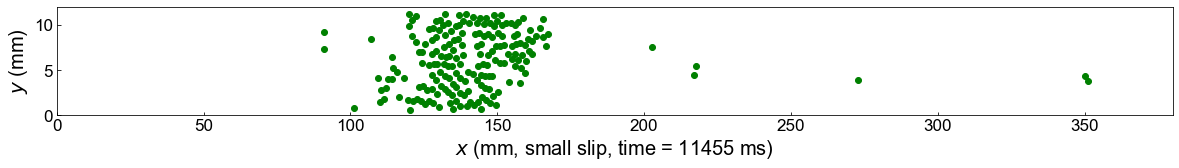

In [8]:
# plot high velocity
plt.rc('font', family = 'Arial')
plt.rcParams['font.size'] = 17
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(20, 2))
plt.scatter(x_hv_ - 70,y_hv_ - 252,c  =  'g')
# plt.scatter(x_hs_,y_hs_,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'g')

# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)'% ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_velocity_grains_small_slip.svg', dpi = 600, format='svg')


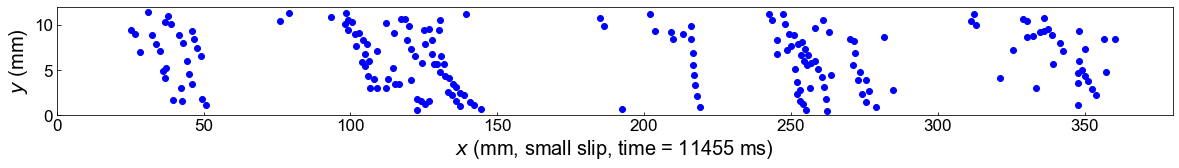

In [9]:
# plot high stress
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 17
# plt.scatter(x_hv_,y_hv_,c  =  'g')
plt.scatter(x_hs_ - 70,y_hs_ - 252,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'b')

# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_tau_grains_small_slip.svg' , dpi = 600, format='svg')


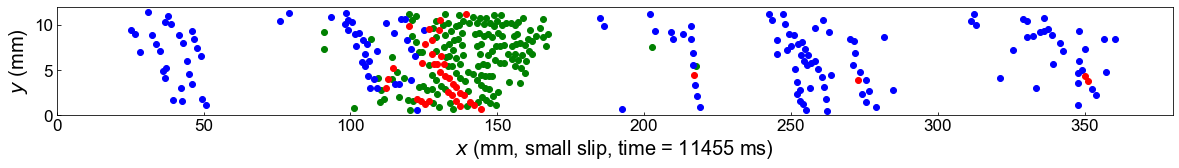

In [10]:
# plot shear stress tau_
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 17
plt.scatter(x_hv_ - 70,y_hv_ - 252,c  =  'g')
plt.scatter(x_hs_ - 70,y_hs_ - 252,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'r')

# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_velocity_and_tau_grains_small_slip.svg' , dpi = 600, format='svg')


In [11]:
# test 2
x_hv_, y_hv_, x_hs_, y_hs_, x_bh_, y_bh_ = extract_data(x1_, x2_, labels_vsigma1_)
print(x_bh_.shape[0]/(x_hs_.shape[0]+x_bh_.shape[0]))  # the ratio of both high 

0.11979166666666667


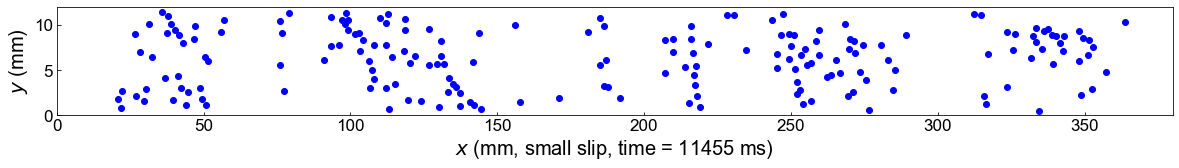

In [12]:
# plot high stress
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['font.size'] = 17
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.scatter(x_hv_,y_hv_,c  =  'g')
plt.scatter(x_hs_ - 70,y_hs_ - 252,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'b')

# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_sigma1_grains_small_slip.svg' , dpi = 600, format='svg')


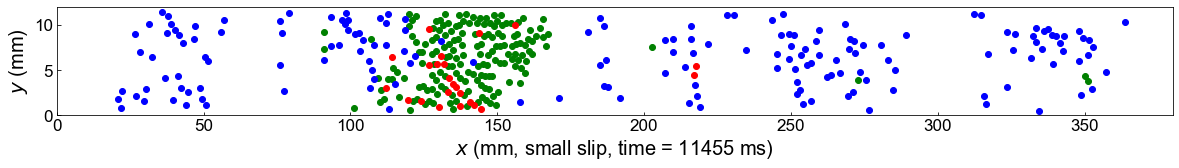

In [13]:
# plot principle stress sigma1
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['font.size'] = 17
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x_hv_ - 70,y_hv_ - 252,c  =  'g')
plt.scatter(x_hs_ - 70,y_hs_ - 252,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'r')

# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)'% ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_v_and_sigma1_grains_small_slip.svg' , dpi = 600, format='svg')


In [14]:
# test 3
x_hv_, y_hv_, x_hs_, y_hs_, x_bh_, y_bh_ = extract_data(x1_, x2_, labels_vsigma2_)
print(x_bh_.shape[0]/(x_hs_.shape[0]+x_bh_.shape[0]))   # the ratio of both high 

0.19270833333333334


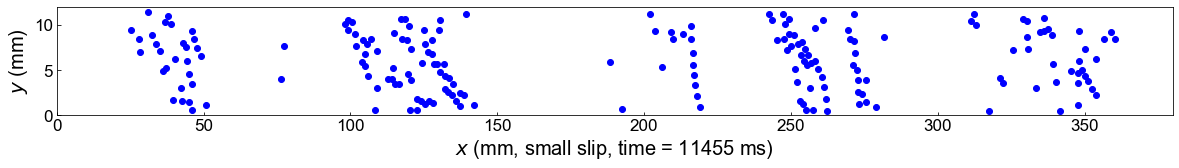

In [15]:
# plot high stress
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 17
# plt.scatter(x_hv_,y_hv_,c  =  'g')
plt.scatter(x_hs_ - 70,y_hs_ - 252,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'b')

# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_sigma2_grains_small_slip.svg' , dpi = 600, format='svg')

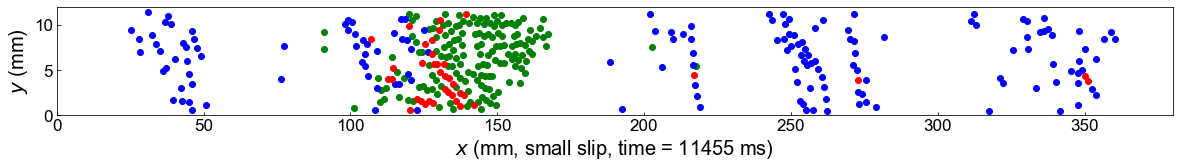

In [16]:
# plot principle stress sigma2
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x_hv_ - 70,y_hv_ - 252,c  =  'g')
plt.scatter(x_hs_ - 70,y_hs_ - 252,c  = 'b')
plt.scatter(x_bh_ - 70,y_bh_ - 252,c  = 'r')


# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)'% ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('high_v_and_sigma2_grains_small_slip.svg' , dpi = 600, format='svg')


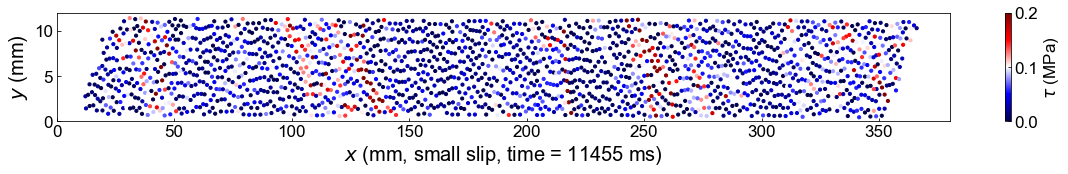

In [17]:
# plot_tau_
plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 17
plt.scatter(x1_ - 70,x2_ - 252,c = tau_, s = 10, cmap = 'seismic',  vmax = 0.2) # vmin = vmx_bottom_, vmax = vmx_top_
cb = plt.colorbar()
cb.set_label(label = r'$\tau$' + ' (MPa)')
# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)'% ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252, 264 - 252])
plt.savefig('cloud_tau_grains_small_slip.svg' , dpi = 600, format='svg')

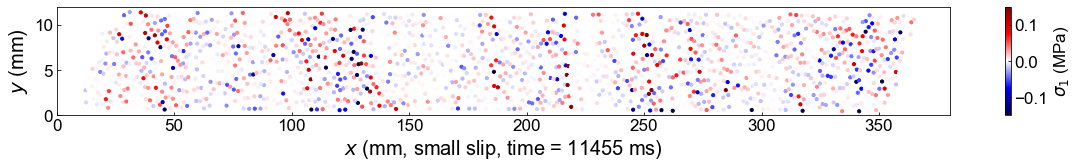

In [18]:
# plot_sigma1_

plt.rc('font', family = 'Arial')
fig = plt.figure(figsize=(20, 2))
plt.rcParams['font.size'] = 17
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x1_ - 70,x2_ - 252,c = sigma1_, s = 10, cmap = 'seismic', vmax = .15,vmin = -0.15 ) # vmin = vmx_bottom_, vmax = vmx_top_
cb = plt.colorbar()
cb.set_label(label = r'$\sigma$' + '$_1$ (MPa)')
# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('$\\mathit{x}$ (mm, small slip, time = %d ms)'% ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('$\\mathit{y}$ (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252, 264 - 252])
plt.savefig('cloud_sigma1_grains_small_slip.svg' , dpi = 600, format='svg')

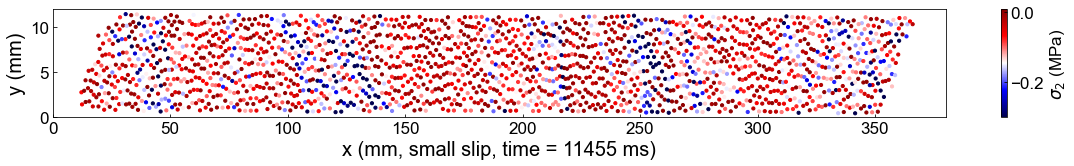

In [19]:
# plot_sigma2_


plt.rc('font', family = 'Arial')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 17
fig = plt.figure(figsize=(20, 2))
plt.scatter(x1_ - 70,x2_ - 252,c = sigma2_, s = 10, cmap = 'seismic', vmin= -0.3 ) # vmin = vmx_bottom_, vmax = vmx_top_
cb = plt.colorbar()
cb.set_label(label = r'$\sigma$' + '$_2$ (MPa)')
# plt.title('Small slip, time = %d ms ' % ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 23)
plt.xlabel('x (mm, small slip, time = %d ms)'% ConSV_PlateBottomBeadMiddle_.loc[index_,'Time'], fontsize = 20)
plt.ylabel('y (mm)', fontsize = 20)

plt.xlim([70 - 70,450 - 70])
plt.ylim([252 - 252,264 - 252])
plt.savefig('cloud_sigma2_grains_small_slip.svg' , dpi = 600, format='svg')